Name: Reshma Jawale

## Prediction using Unsupervised Learning

### Kmeans Clustering

## Importing necessary libraries

In [190]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

## Loading the Dataset

In [191]:
# Loading the dataset
df_iris=pd.read_csv('C:/Users/Reshma Jawale/SparksInternship/iris.csv')
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [192]:
#drop the id columns
df_iris.drop(['Id'],axis=1,inplace=True)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



## Data Understanding

In [193]:
# Checking the count of rows and columns in dataset
df_iris.shape

(150, 5)

In [194]:
df_iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [195]:
df_iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [196]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [197]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [198]:
# Checking for null values in the dataset
df_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

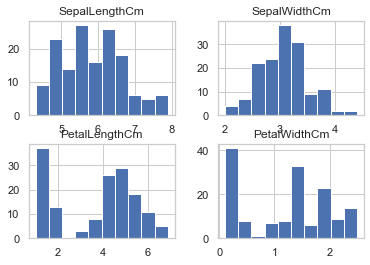

In [199]:
df_iris.hist()

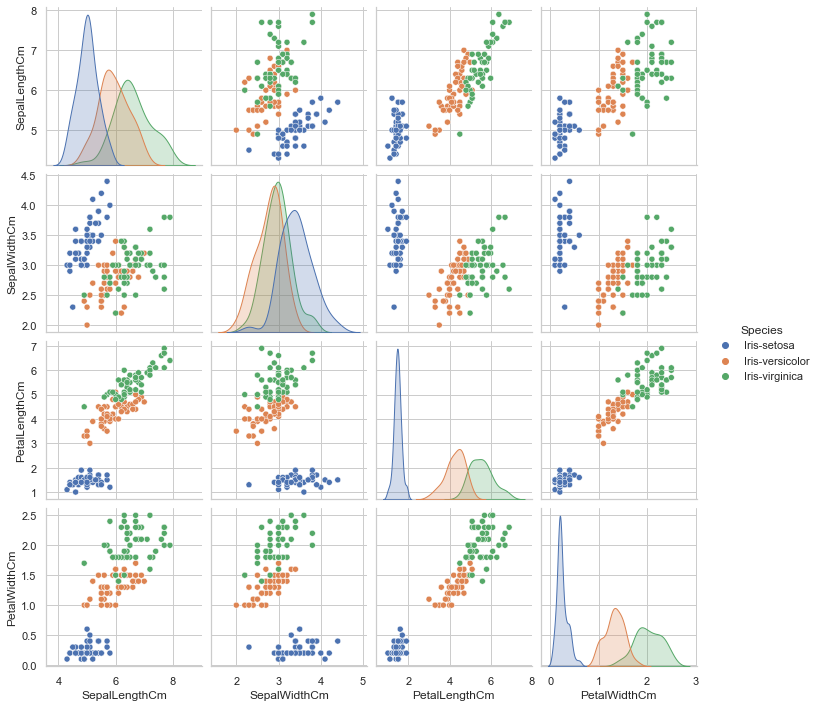

In [200]:
#visualizing data and how each other are correlated
sns.pairplot(df_iris,hue='Species')

[]

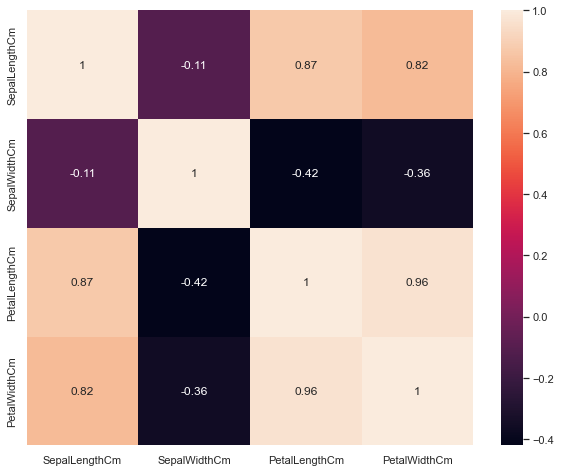

In [201]:
#Now we will see how these features are correlated to each 
plt.figure(figsize=(10,8))
sns.heatmap(df_iris.corr(),annot=True)
plt.plot()

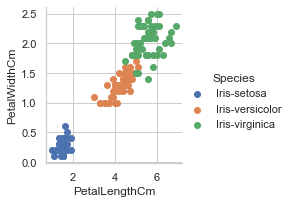

In [202]:
sns.FacetGrid(df_iris,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()

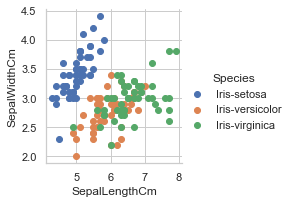

In [203]:
sns.FacetGrid(df_iris,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

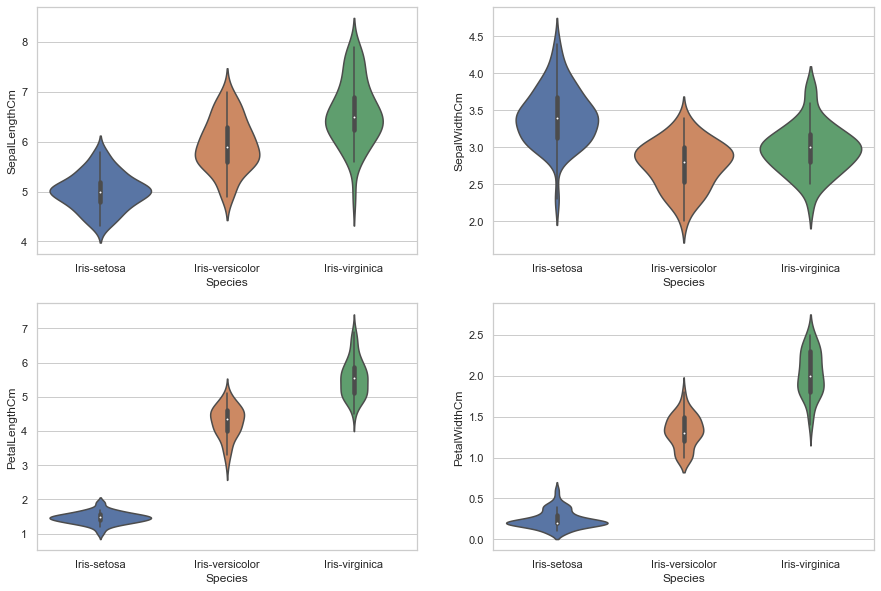

In [204]:
#Violin Plot. The violinplot shows density of the length and width in the species. 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=df_iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=df_iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=df_iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=df_iris)

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

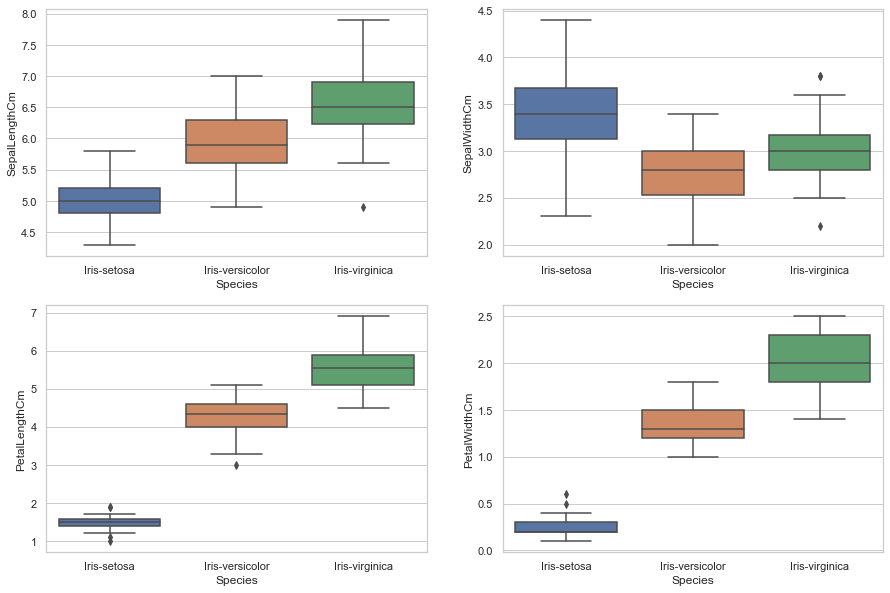

In [205]:
#Box plot for distribution of target variable wrt all independent variables
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df_iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=df_iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df_iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=df_iris)

In [206]:
#categorical columns to numerical columns.
def Spec(s):
  if s == 'Iris-setosa':
    return 0
  elif s == 'Iris-versicolor':
    return 1
  else:
    return 2

df_iris.Species =  df.Species.apply(lambda x: Spec(x))

In [207]:
#Train test split
X= df.iloc[:,0:4]
y = df.iloc[:,4:5]

In [208]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [209]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\Reshma Jawale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[281831.54466666665,
 70581.38079999998,
 31320.711200000005,
 17777.809912280703,
 11422.155508342605,
 7906.994015384616,
 5892.121219179371,
 4559.954436704506,
 3568.022749183007,
 2962.7876550581773]

C:\Users\Reshma Jawale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


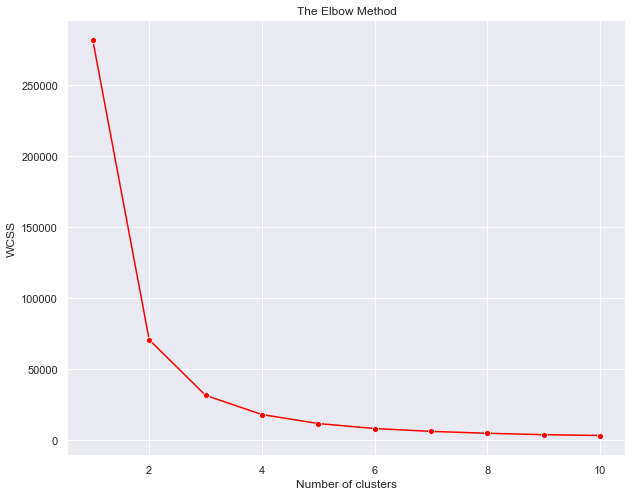

In [210]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [211]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5)
y_kmeans = kmeans.fit_predict(X)

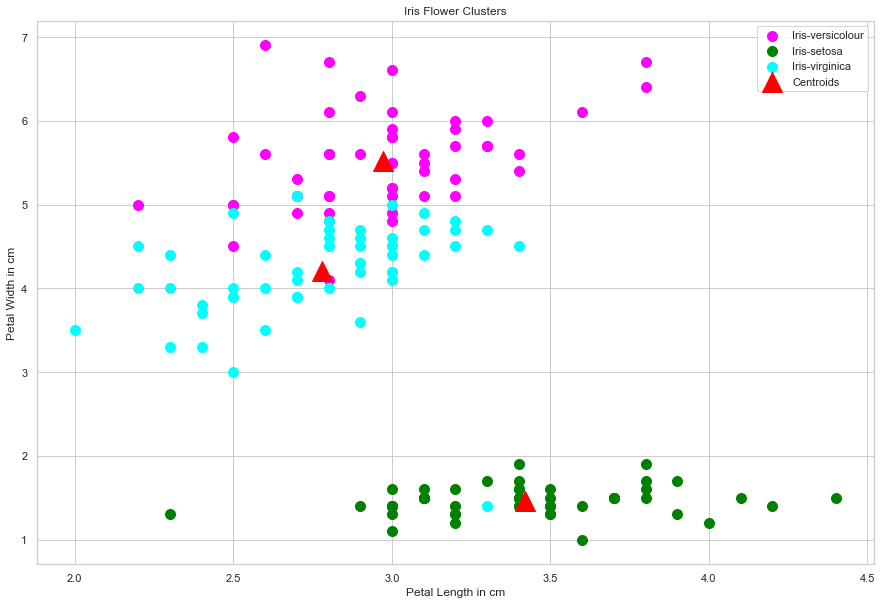

In [212]:
fig = plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.scatter(X.values[y_kmeans == 0, 2], X.values[y_kmeans == 0, 3], s = 100, c = 'magenta', label = 'Iris-versicolour')
plt.scatter(X.values[y_kmeans == 1, 2], X.values[y_kmeans == 1, 3], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(X.values[y_kmeans == 2, 2], X.values[y_kmeans == 2, 3],s = 100, c = 'cyan', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 400, c = 'red',marker='^', 
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()